# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## 1.Gather Data

In [2]:
boston_dataset = load_boston()
type(boston_dataset)

sklearn.utils.Bunch

## 2. Explore and Clean Data

In [3]:
dir(boston_dataset)                #shows list of attributes

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)        #shows description of that attribute

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 2.1 Datapoints and features

In [5]:
type(boston_dataset.data)
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston_dataset.data.shape      # shows number of rows and columns in attributes data

(506, 13)

In [7]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
# shows price of houses in 1000s
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 2.2 Data exploration with Pandas Dataframe

In [9]:
#to create a pandas dataframe without housing price 
data = pd.DataFrame(data=boston_dataset.data , columns=boston_dataset.feature_names)
print('data shape before adding target',data.shape)

#Add column target(housing price) to data
data['PRICE'] = boston_dataset.target
print('data shape after adding target', data.shape)

data shape before adding target (506, 13)
data shape after adding target (506, 14)


In [10]:
#shows top rows
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [11]:
#shows bottom rows
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [12]:
#shows number of rows
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### 2.3 Cleaning Data and Checking for missing values

In [13]:
data.isnull()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  PRICE  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [14]:
#To check null or missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 3. Data Visualisation
### 3.1 Visualising Data - Histograms,Distribution & Bar Charts

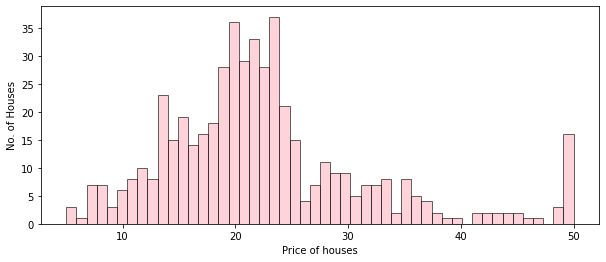

In [15]:
#For plotting pricing of house
plt.figure(figsize = (10,4))
plt.hist(data['PRICE'], bins=50 , ec='black',color='lightpink',alpha=0.6)
plt.xlabel("Price of houses")
plt.ylabel('No. of Houses')
plt.show()

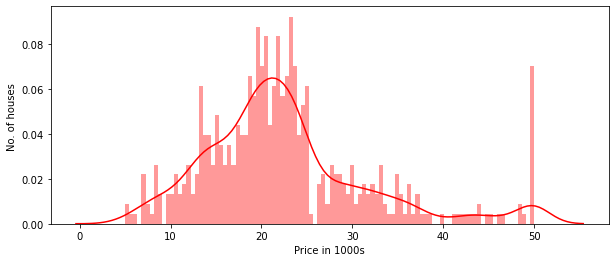

In [16]:
#Plotting using Sea born
plt.figure(figsize=(10,4))
sns.distplot(data['PRICE'] , bins=100 ,hist=True , kde=True , color='red')
plt.xlabel('Price in 1000s')
plt.ylabel('No. of houses ')
plt.show()

In [57]:
data.PRICE.skew()

1.1080984082549072

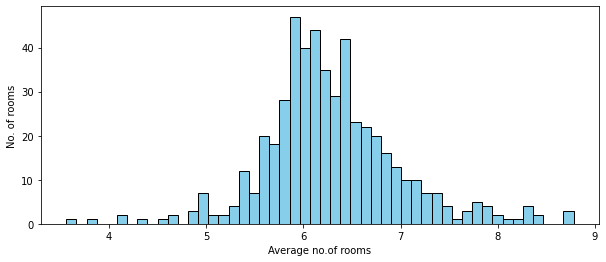

In [17]:
# to plot average number of rooms using matplotlib and seaborn
plt.figure(figsize=(10,4))
plt.hist(data["RM"],ec='black',bins=50,color='skyblue')
plt.xlabel('Average no.of rooms')
plt.ylabel('No. of rooms')
plt.show()

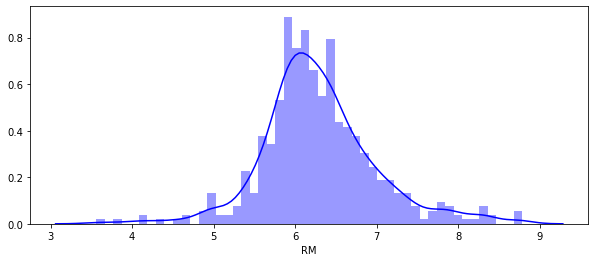

In [18]:
plt.figure(figsize=(10,4))
sns.distplot(data['RM'],bins=50,color='blue')
plt.show()

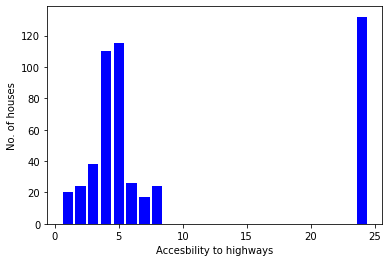

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


In [19]:
#plotting for RAD(Using bar graph)
data['RAD'].value_counts()
frequency = data['RAD'].value_counts()
frequency.index                      #to find indexing number

plt.bar(frequency.index , height = frequency , color='blue')
plt.xlabel('Accesbility to highways')
plt.ylabel('No. of houses')
plt.show()

print(data['RAD'].value_counts())

In [20]:
data['CHAS'].value_counts()          #to illustrate dummy variable

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [21]:
# To find minimum,maximum,mean and median
data.mean()
#data.min() for minimum
#data.max()
#data.median()


CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [22]:
data['PRICE'].min()
#data['PRICE'].mean()
#data['PRICE'].max()
#data['PRICE'].median

5.0

### 3.2 Correlation
### $$ \rho_{xy} = corr{(X,Y)} $$
### $$ -1.0 \leq \rho_{xy} \leq +1.0 $$

In [23]:
#corelation btwn price and average housing
data['PRICE'].corr(data["RM"])

0.695359947071539

In [24]:
#corelation btwn price and pupil to teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [25]:
data['PTRATIO'].corr(data["PRICE"])        #even by changing the variables the value remains same

-0.5077866855375615

In [26]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

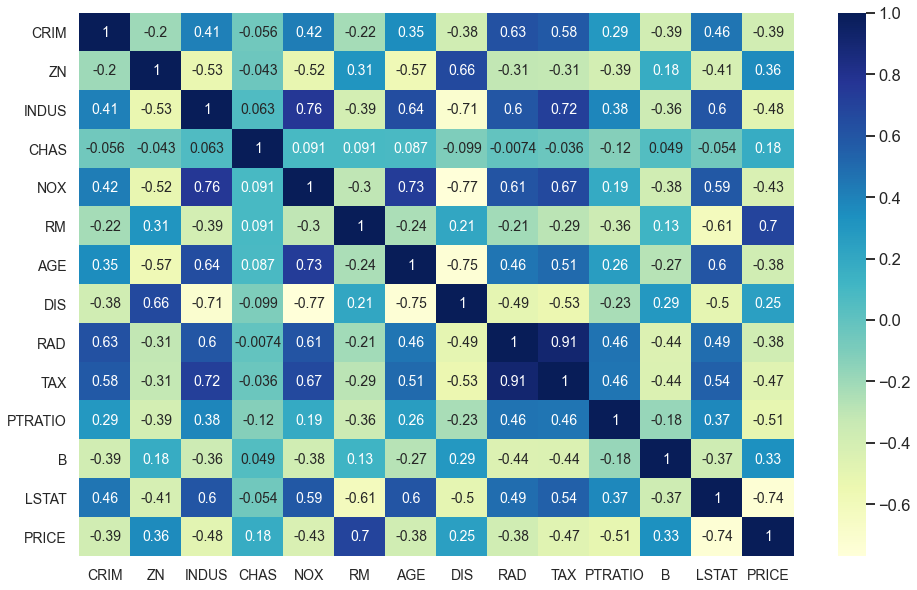

In [65]:
#plotting correlation btwn features

plt.figure(figsize=(16,10))
sns.heatmap(data.corr() ,annot=True , annot_kws = {'size':14},cmap = plt.cm.YlGnBu)
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### 3.3 Advanced Visualisations(Scatter plot) using Matplotlib and Sea Born

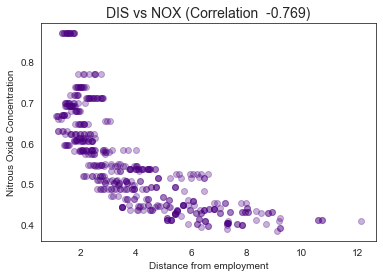

In [29]:
#To show correlation btwn nox and dis

nox_dis_corr = round(data['NOX'].corr(data['DIS']) , 3)

plt.scatter(data['DIS'] , data['NOX'] , alpha = 0.3 , color='indigo')
plt.title(f'DIS vs NOX (Correlation  {nox_dis_corr})',fontsize = 14)
plt.xlabel('Distance from employment')
plt.ylabel('Nitrous Oxide Concentration')
plt.show()

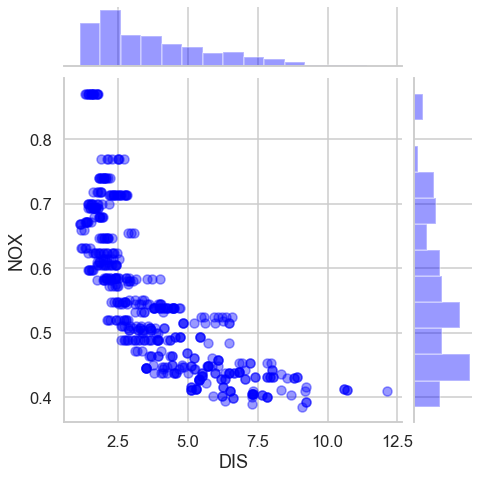

In [30]:
#using sea born

sns.set()
sns.set_context('talk')                  #use of template
sns.set_style('whitegrid')
sns.jointplot(data['DIS'] , data['NOX'] , height = 7 , color = 'blue' , alpha=0.4 )
plt.show()

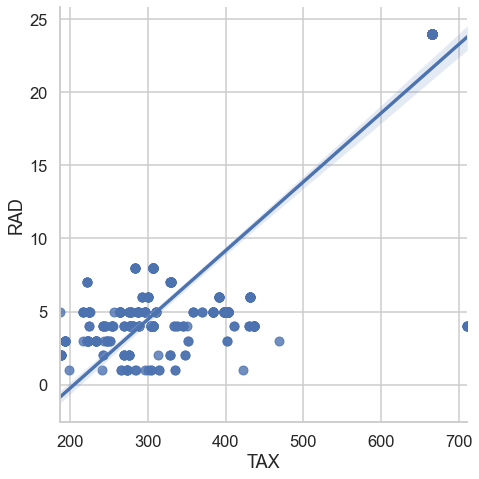

In [31]:
#To plot Linear regression without using linear model
#linear regression using seaborn
sns.lmplot(x='TAX' , y='RAD' , data=data , height =7)
plt.show()

#### 3.3.1 Plotting Scatter for all features at once

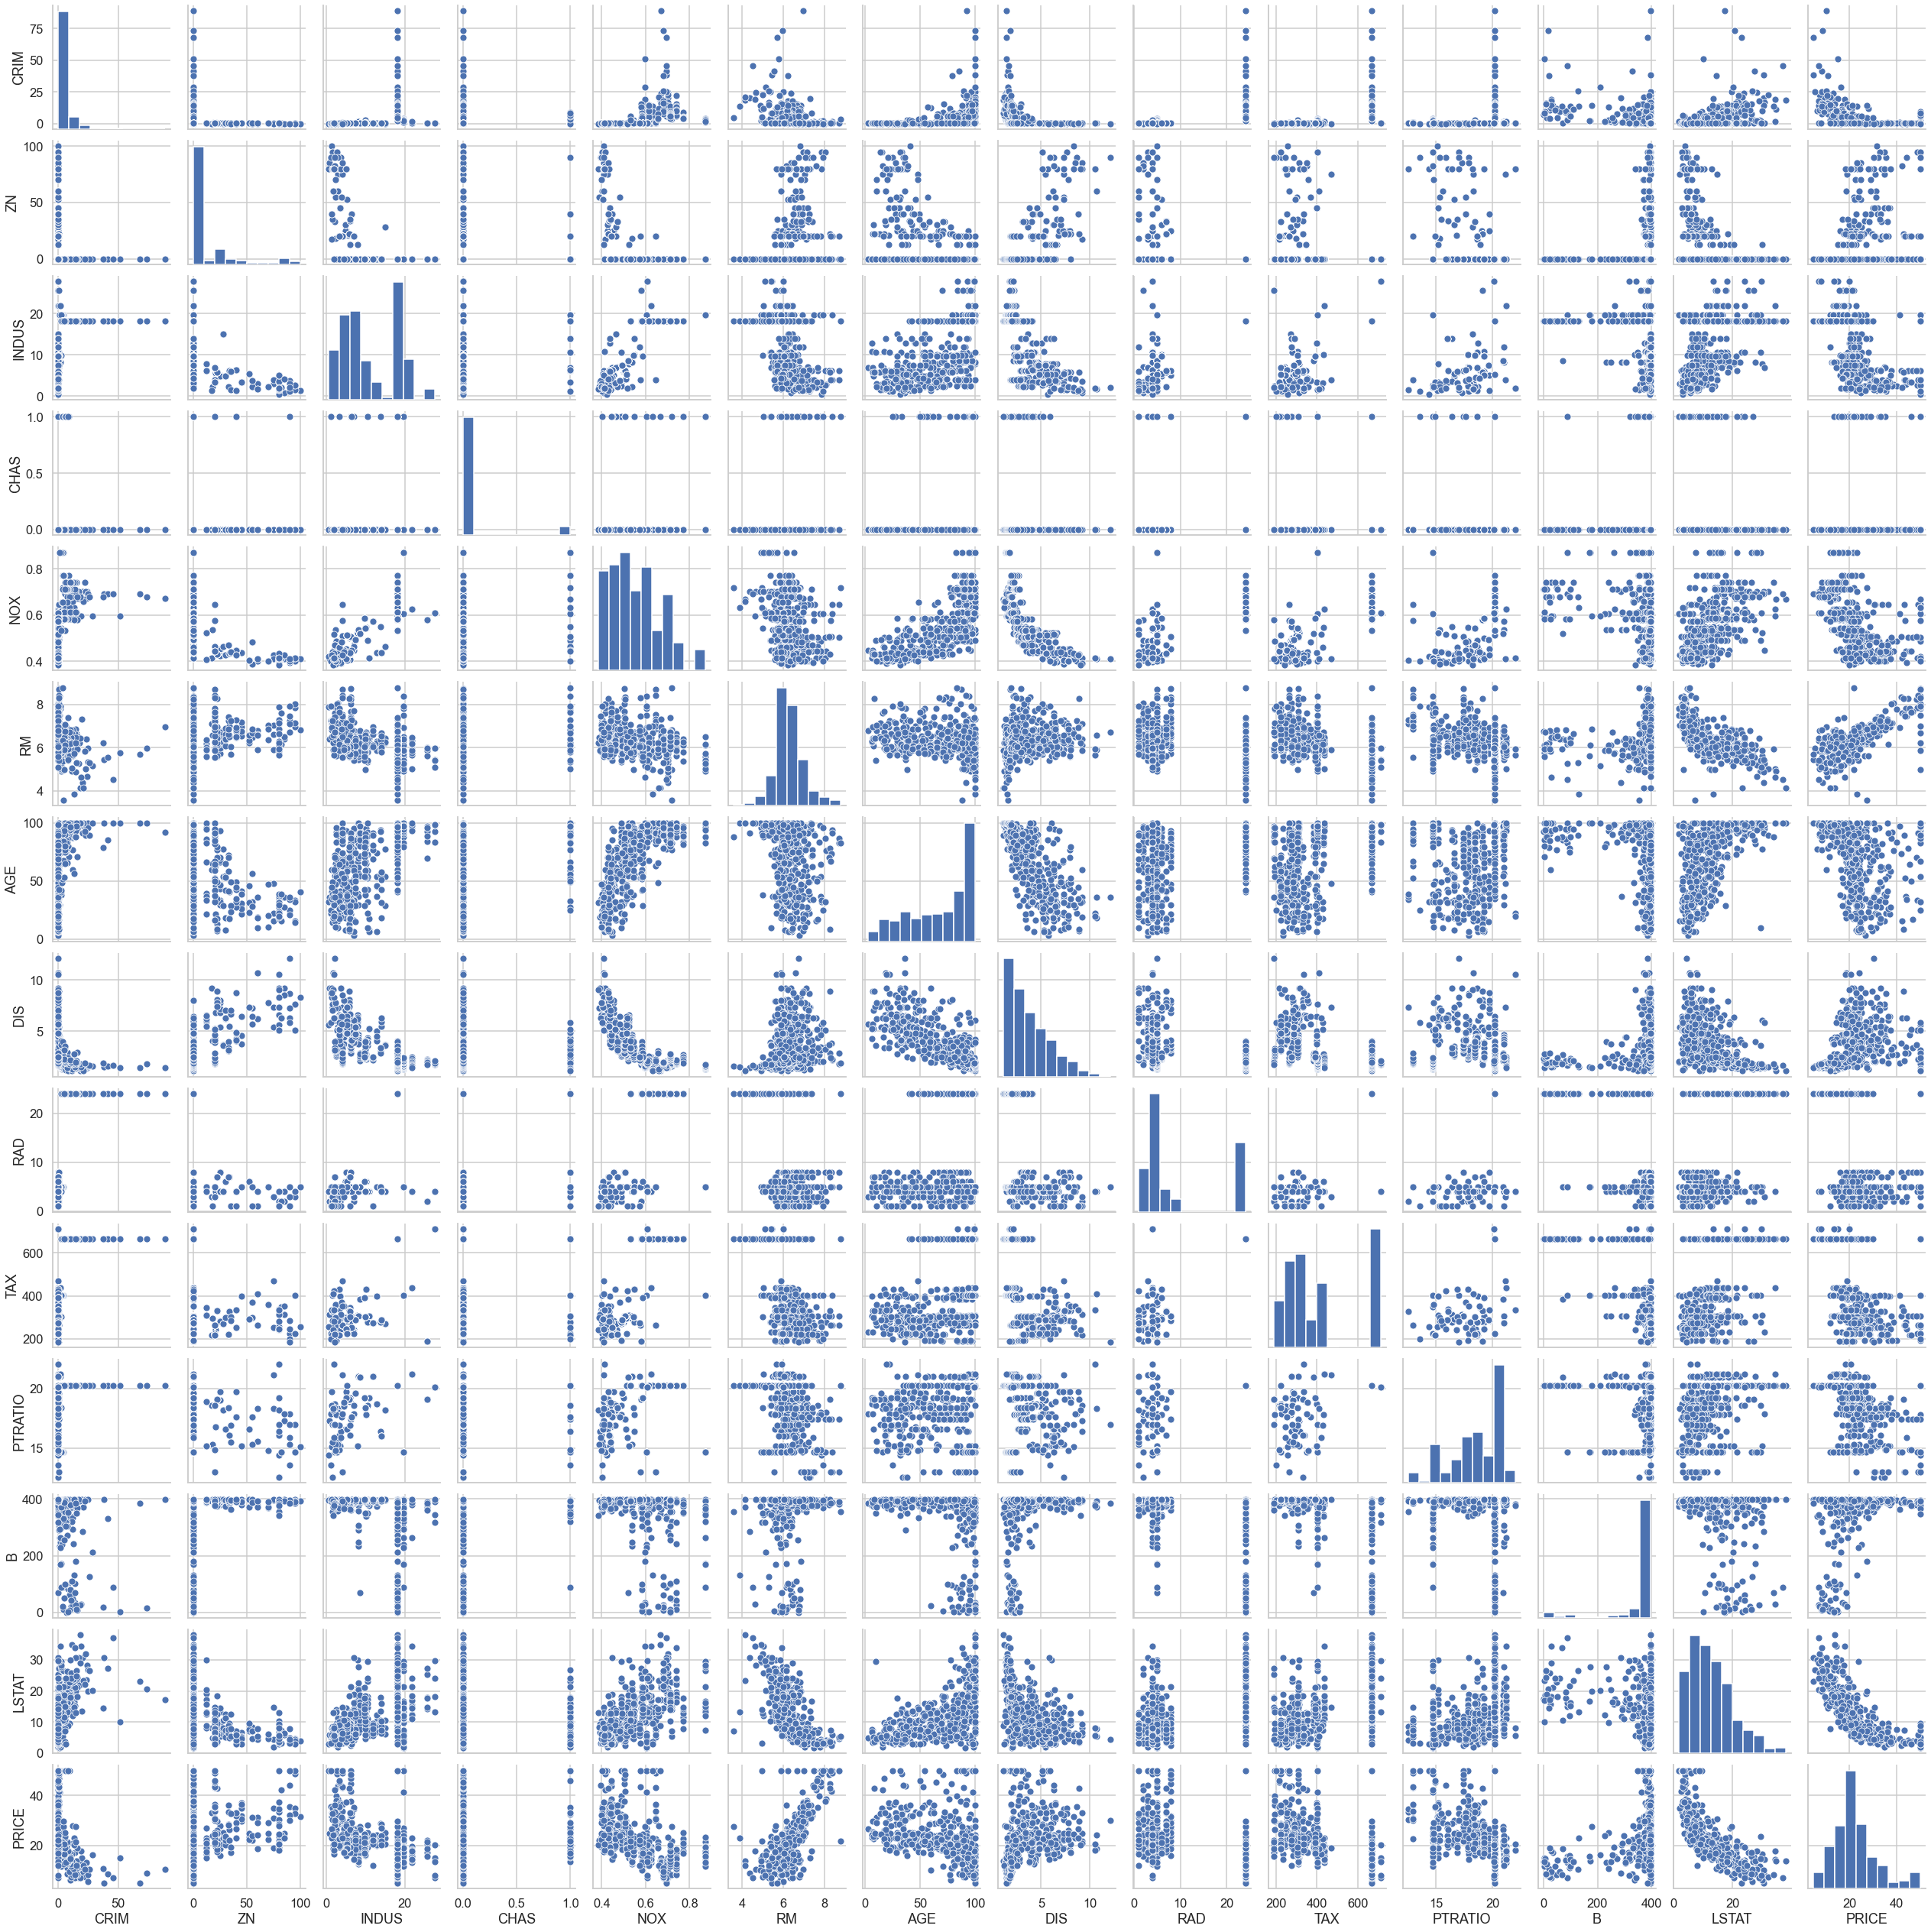

Wall time: 1min 43s


In [32]:
%%time

sns.pairplot(data)
plt.show()

### 3.3.2 Plotting Linear Regression line for all features at once

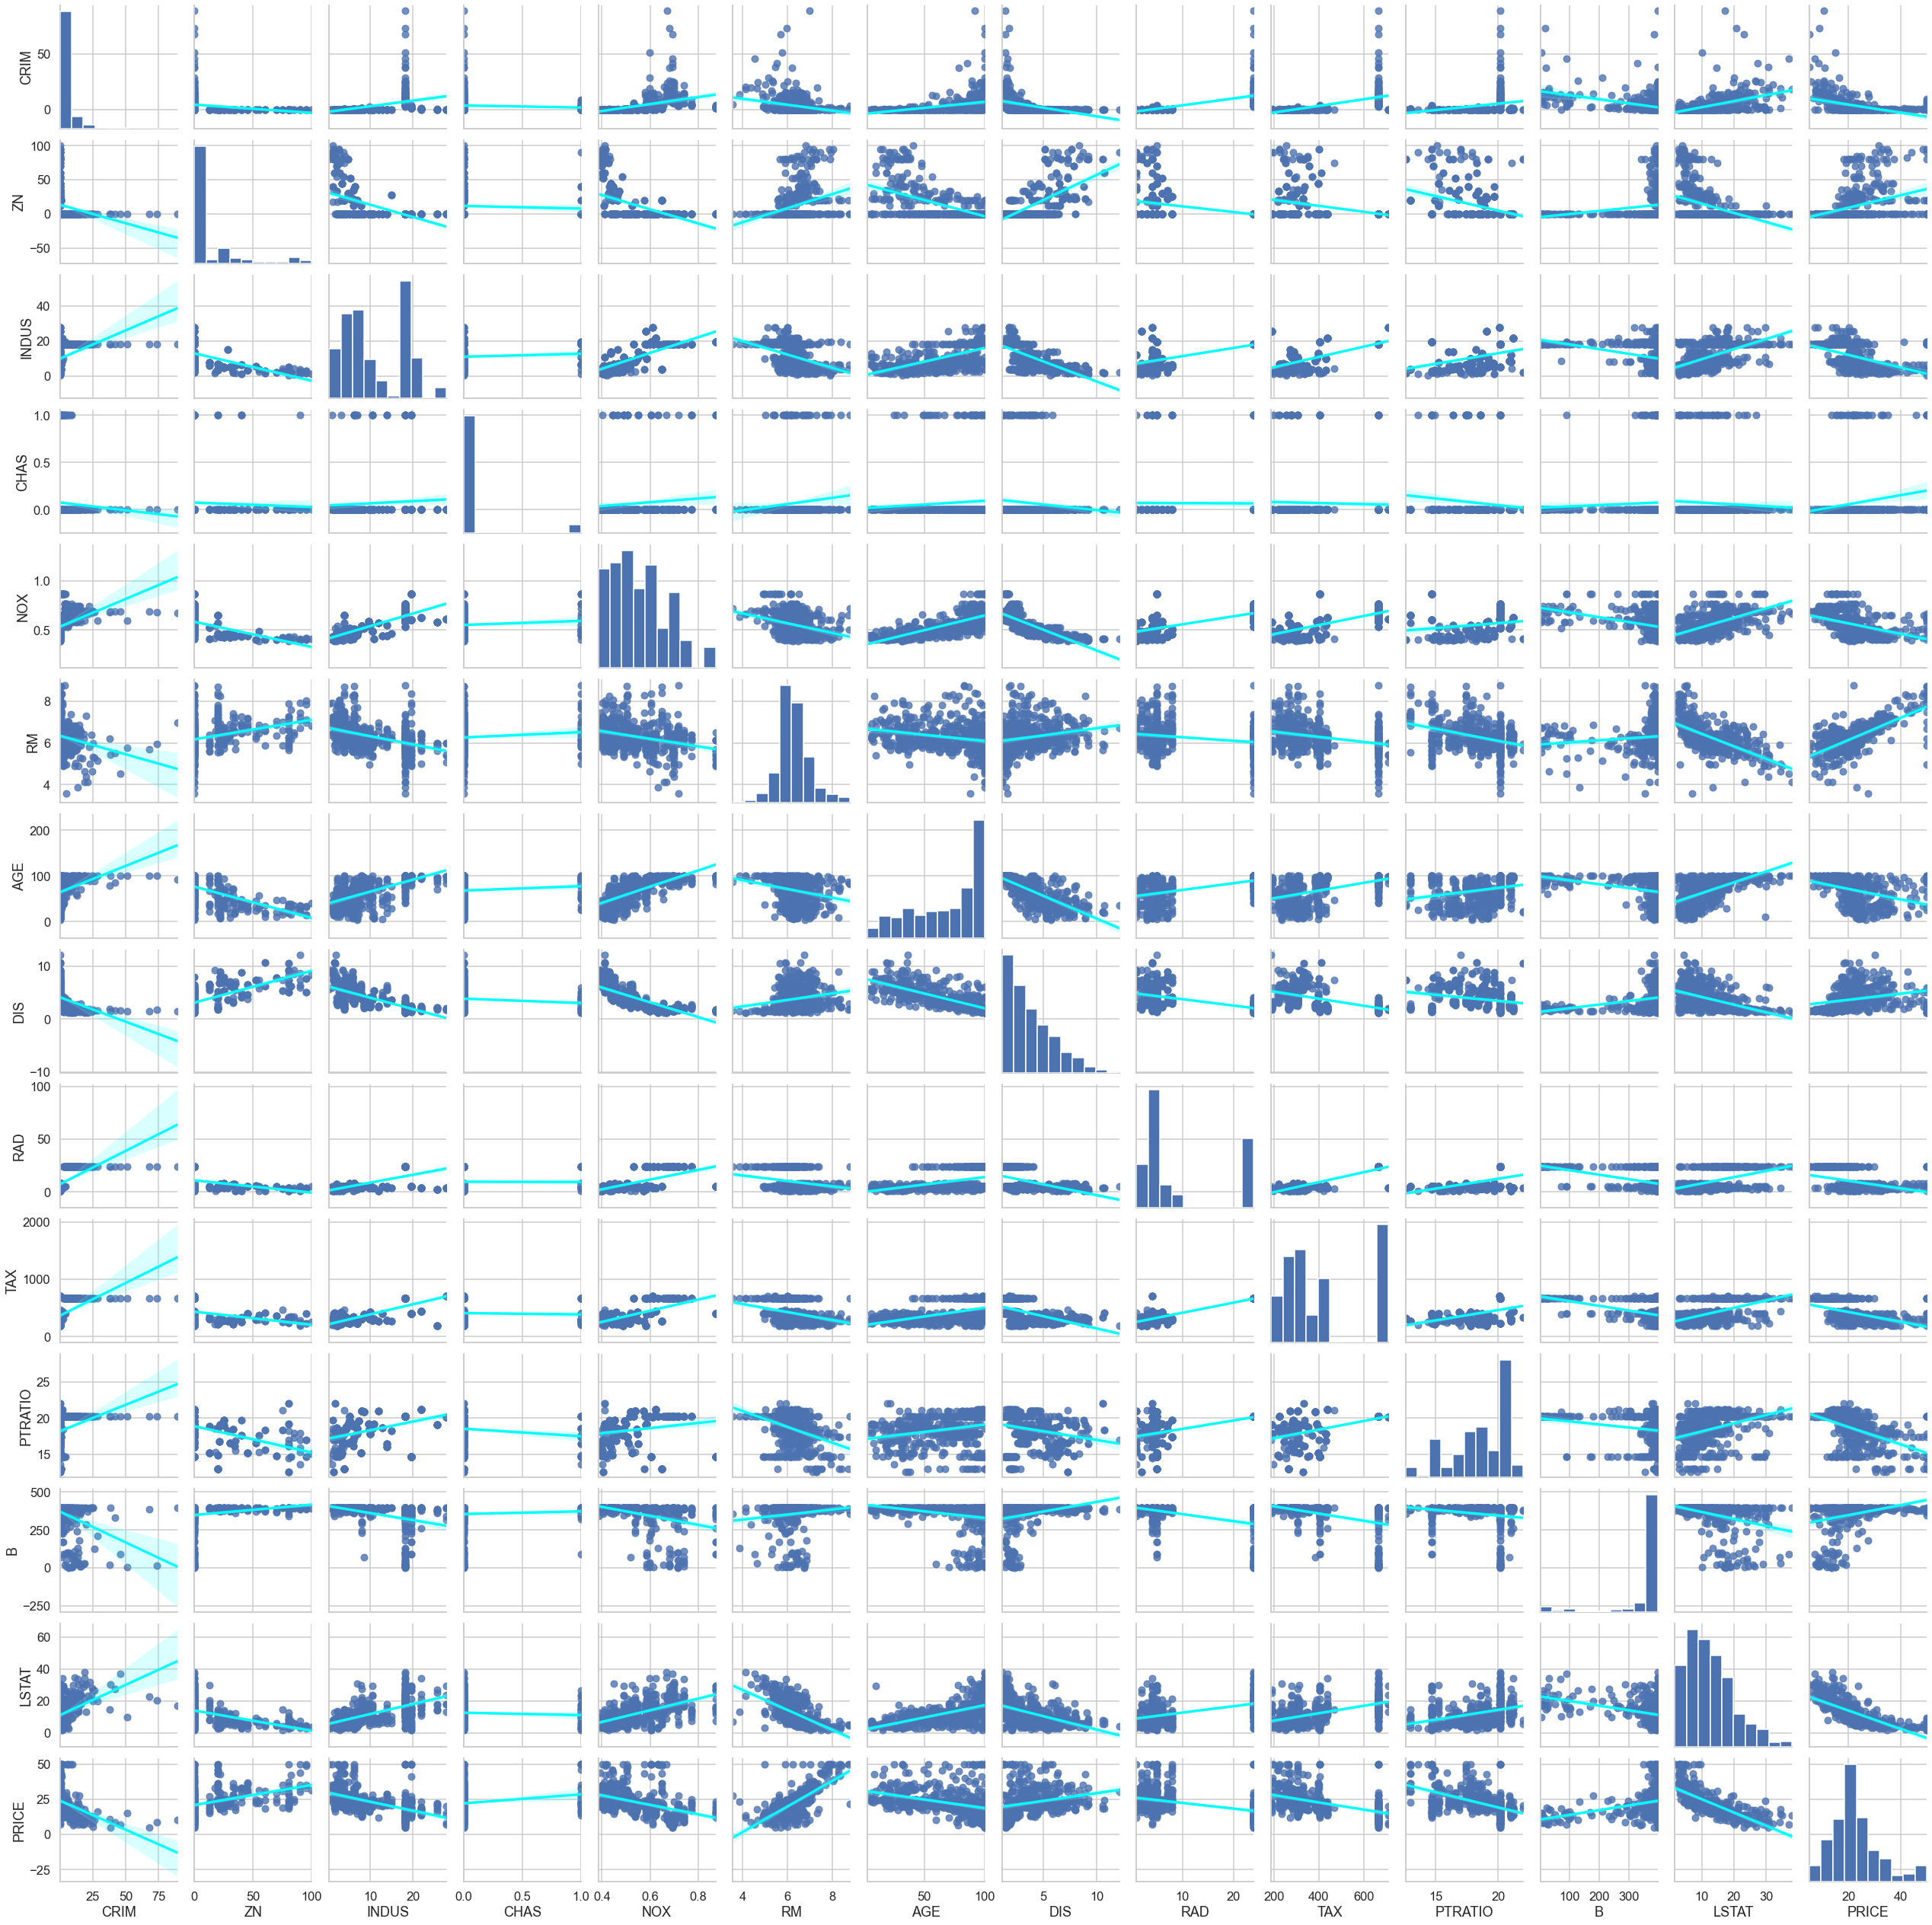

Wall time: 2min 40s


In [33]:
%%time

sns.pairplot(data , kind='reg' , plot_kws = {'line_kws': {'color':'cyan'}})
plt.show()

## 4. Train,Test and Split

In [34]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

## 5 Data Transformation
### 5.1 Skew 

In [35]:
y_price = data['PRICE'].skew()
data['PRICE'].skew()

1.1080984082549072

In [36]:
#applying log to reduce skew value
y_log = np.log(data['PRICE'])
y_log.skew()

-0.33032129530987864

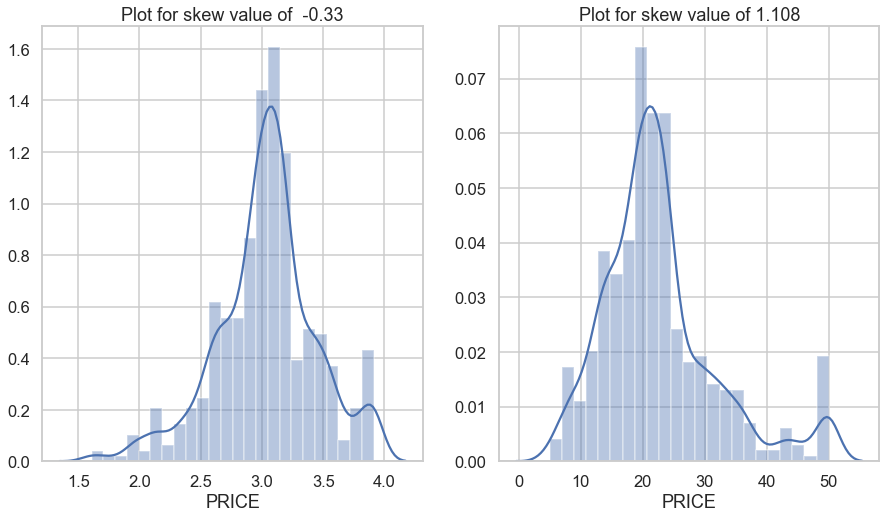

In [37]:
#to plot price after applying log
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot(y_log)
plt.title(f'Plot for skew value of  {round(y_log.skew(),3)}')


plt.subplot(1,2,2)
sns.distplot(data['PRICE'])
plt.title(f'Plot for skew value of {round(y_price,3)}' )
plt.show()

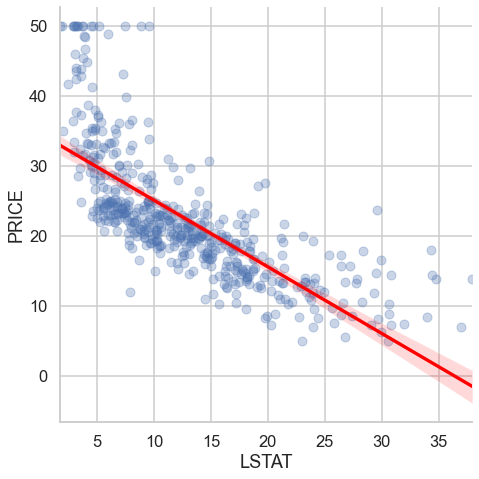

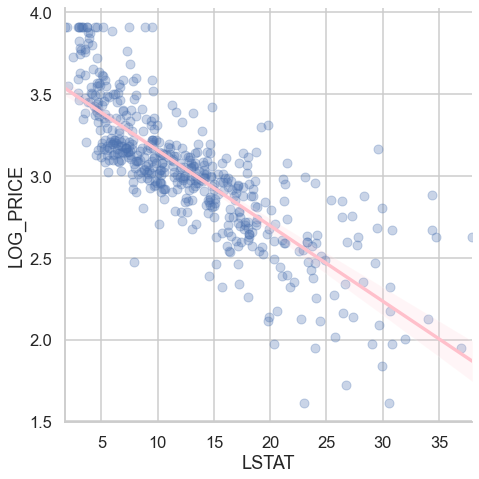

In [38]:
#To show comparison between other features with price features before and after applying log

#fig 1
sns.lmplot(x='LSTAT' , y ='PRICE', data = data,height= 7 , scatter_kws={'alpha':0.3},
           line_kws={'color' : 'red'} )


#fig 2
transformed_data = features
transformed_data['LOG_PRICE'] = np.log(data['PRICE'])
sns.lmplot(x='LSTAT' , y='LOG_PRICE' , data = transformed_data , height = 7 ,
           scatter_kws={'alpha':0.3} , line_kws={'color':'pink'})

plt.show()

### 5.2 Regression for log prices using train,test and split method

In [39]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis = 1)

X_train,X_test,y_train,y_test = train_test_split(features , prices , test_size = 0.2 , 
                                                random_state = 10)
regr = LinearRegression()
regr.fit(X_train,y_train)

print('Training r squared value' , regr.score(X_train,y_train))
print('Testing r squared value' , regr.score(X_test,y_test))

#pd.DataFrame(data=regr.coef_ , index = X_train.columns , columns=['coef'])
pd.DataFrame({'index':X_train.columns,'coef' : regr.coef_})


Training r squared value 0.7930234826697583
Testing r squared value 0.7446922306260724


index      coef
0      CRIM -0.010672
1        ZN  0.001579
2     INDUS  0.002030
3      CHAS  0.080331
4       NOX -0.704068
5        RM  0.073404
6       AGE  0.000763
7       DIS -0.047633
8       RAD  0.014565
9       TAX -0.000645
10  PTRATIO -0.034795
11        B  0.000516
12    LSTAT -0.031390

### 5.3 P-Values and Evaluating Co-efficients

In [40]:
X = data.drop('PRICE', axis = 1)
Y = np.log(data['PRICE'])

In [41]:
X_1 = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X_1 , Y , test_size = 0.2 , 
                                                random_state = 10)
model_1 = sm.OLS(y_train , X_train).fit()

pd.DataFrame({'coef' : model_1.params , 'p-values' : round(model_1.pvalues,4)})

coef  p-values
const    4.059944    0.0000
CRIM    -0.010672    0.0000
ZN       0.001579    0.0086
INDUS    0.002030    0.4445
CHAS     0.080331    0.0382
NOX     -0.704068    0.0000
RM       0.073404    0.0001
AGE      0.000763    0.2092
DIS     -0.047633    0.0000
RAD      0.014565    0.0000
TAX     -0.000645    0.0001
PTRATIO -0.034795    0.0000
B        0.000516    0.0000
LSTAT   -0.031390    0.0000

### 6 Testing for Multicollinearity
#### 6.1 Variance Inflation Factor (VIF)
$$ TAX = \alpha_0 + \alpha_1 RM +\alpha_2 NOX +.....+\alpha_{12}LSTAT $$

$$ VIF = \frac {1}{1 - R_{TAX}^2} $$

In [42]:
variance_inflation_factor(exog=X.values,
                          exog_idx=1)              #here values convert dataframe to ndarray

2.8440132669462646

In [43]:
#to print no.of columns in x_incl_const
#len(X_incl_const.columns)
X.shape[1]

13

In [44]:
# to write loop to run VIF for all features
vif = []
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(exog = X.values,
                                        exog_idx=i))
pd.DataFrame({'coef name':X.columns , 'vif' : np.around(vif , 3) })  

coef name     vif
0       CRIM   2.100
1         ZN   2.844
2      INDUS  14.486
3       CHAS   1.153
4        NOX  73.895
5         RM  77.948
6        AGE  21.387
7        DIS  14.700
8        RAD  15.168
9        TAX  61.227
10   PTRATIO  85.030
11         B  20.105
12     LSTAT  11.102

### 7 Model Simplification
#### 7.1 Baysian Information Criterion (BIC)

In [45]:
# For model 1
org_coef = pd.DataFrame({'coef':model_1.params, 'p value':round(model_1.pvalues,3)})

print('BIC',model_1.bic)
print('rsquared',model_1.rsquared)

BIC -139.74997769478875
rsquared 0.7930234826697582


**Model_2**

In [46]:
#Model 2 using log price exculding indus features

X_2 = X_1.drop(['INDUS'] , axis =1)

X_train,X_test,y_train,y_test = train_test_split(X_2 , Y , test_size = 0.2 , 
                                                random_state = 10)

model_2 = sm.OLS(y_train , X_train).fit()


coef_minus_indus = pd.DataFrame({'coef':model_2.params , 'p values':round(model_2.pvalues,3)})

print('BIC', model_2.bic)
print('r squared', model_2.rsquared)

BIC -145.14508855591163
r squared 0.7927126289415163


In [47]:
#Model 3 with log price excluding INDUS and AGE features

X_3 = X_1.drop(['INDUS' , 'AGE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_3 , Y , test_size = 0.2 , 
                                                random_state = 10)

model_3 = sm.OLS(y_train , X_train).fit()

reduced_coef = pd.DataFrame({'coef':model_3.params , 'p values':round(model_3.pvalues , 3)})

print('BIC',model_3.bic)
print('r squared' , model_3.rsquared)

BIC -149.49934294224656
r squared 0.7918657661852815


In [48]:
#Comparison of 3 models
frames = [org_coef , coef_minus_indus , reduced_coef]
pd.concat(frames , axis=1)

coef  p value      coef  p values      coef  p values
const    4.059944    0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672    0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579    0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030    0.445       NaN       NaN       NaN       NaN
CHAS     0.080331    0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068    0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404    0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763    0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633    0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565    0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645    0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795    0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516    0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390    0.000 -0.031262     0.000 -0.030271     0.000

### 7.2 Residuals and Residuals Plot


###### Actual vs Predicted values using log PRICE excluding INDUS & AGE features

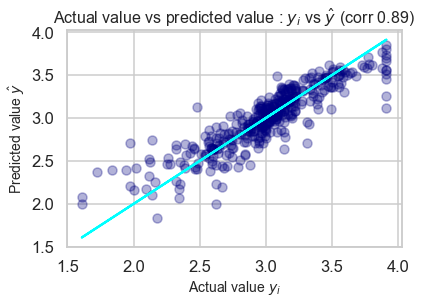

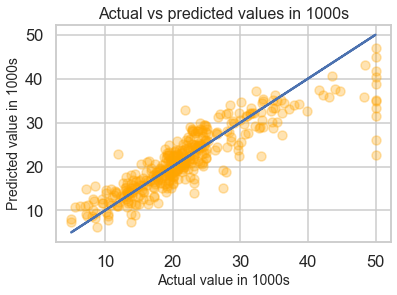

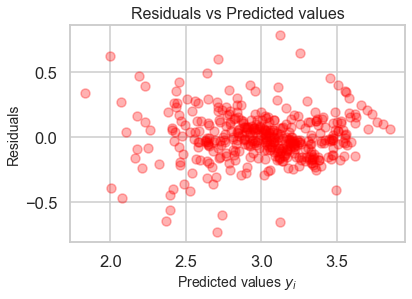

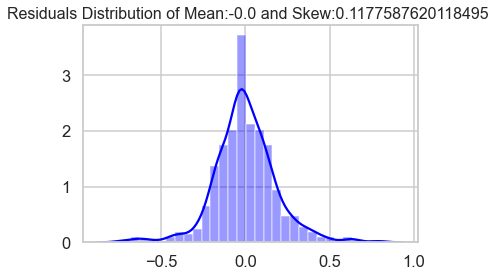

In [49]:


# GRAPH 1 : Actual value(y_train) vs Predicted Values(results.fittedvalues)

corr = round(y_train.corr(model_3.fittedvalues) , 2)
plt.scatter(x=y_train , y=model_3.fittedvalues , color='navy',alpha=0.3)
plt.plot(y_train , y_train , c='cyan')
plt.title(f'Actual value vs predicted value : $y_i$ vs $\hat y$ (corr {corr})',fontsize=16)
plt.xlabel('Actual value $y_i$',fontsize=14)
plt.ylabel('Predicted value $\hat y$',fontsize=14)
plt.show()



# GRAPH 2 : Changing log values to exponential value(Real value in thousands)

plt.scatter(x = np.e**y_train , y = np.e**model_3.fittedvalues , alpha=0.3 , color = 'orange')
plt.plot(np.e**y_train , np.e**y_train)
plt.title('Actual vs predicted values in 1000s',fontsize=16)
plt.xlabel('Actual value in 1000s',fontsize = 14)
plt.ylabel('Predicted value in 1000s', fontsize = 14)
plt.show()


# GRAPH 3 : Residuals vs fitted values

plt.scatter(x=model_3.fittedvalues , y = model_3.resid , alpha = 0.3 , color='red')
plt.title('Residuals vs Predicted values' , fontsize=16)
plt.xlabel('Predicted values $y_i$' , fontsize=14)
plt.ylabel('Residuals' , fontsize = 14)
plt.show()


# GRAPH 4 : Distribution of Residuals

resid_mean = round( model_3.resid.mean() , 3)
resid_skew = model_3.resid.skew()

sns.distplot(model_3.resid , color='blue')
plt.title(f'Residuals Distribution of Mean:{resid_mean} and Skew:{resid_skew} ', fontsize =16)
          
plt.show()



In [50]:
#Mean squared error and R squared

reduced_log_mse = round(model_3.mse_resid,3)
reduced_log_rsquared = round(model_3.rsquared,3)

In [51]:
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.786    
Dependent Variable: PRICE            AIC:                -197.5163
Date:               2020-08-13 17:59 BIC:                -149.4993
No. Observations:   404              Log-Likelihood:     110.76   
Df Model:           11               F-statistic:        135.6    
Df Residuals:       392              Prob (F-statistic): 3.68e-126
R-squared:          0.792            Scale:              0.034873 
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      4.0359     0.2265    17.8193   0.0000    3.5906    4.4812
CRIM      -0.0107     0.0013    -8.0016   0.0000   -0.0133   -0.0081
ZN         0.0015     0.0006     2.4650   0.0141    0.0003    0.0026
CHAS       0.0864     0.0384     2.2514   0.0249    0.0110    0.1619
NOX       -0.6164     0.1545    -3.9896   0.0001   -0.9202   -0.3127
RM         0.0761     0.0183     4.1546   0.0000    0.0401    0.1122
DIS       -0.0527     0.0083    -6.3764   0.0000   -0.0689   -0.0364
RAD        0.0137     0.0027     5.0604   0.0000    0.0084    0.0191
TAX       -0.0006     0.0001    -4.0980   0.0001   -0.0009   -0.0003
PTRATIO   -0.0335     0.0058    -5.7695   0.0000   -0.0449   -0.0221
B          0.0005     0.0001     4.6106   0.0000    0.0003    0.0007
LSTAT     -0.0303     0.0021   -14.7058   0.0000   -0.0343   -0.0262
------------------------------------------------------------------
Omnibus:              30.564       Durbin-Watson:          2.072  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       117.705
Skew:                 0.117        Prob(JB):               0.000  
Kurtosis:             5.634        Condition No.:          15038  
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [52]:
#For 95% interval , using reduced log model
#Our prediction is $30,000

print('1 SD in log prices is ' , np.sqrt(reduced_log_mse))
print('2 SD in log prices is ' , 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)

print('The upper bound in log price' , upper_bound)
print('The upper bound in 1000s' , np.e**upper_bound*1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)

print('The lower bound in log price' , lower_bound)
print('The lower bound in 1000s' , np.e**lower_bound*1000)

1 SD in log prices is  0.18708286933869708
2 SD in log prices is  0.37416573867739417
The upper bound in log price 3.7753631203395495
The upper bound in 1000s 43613.34233239937
The lower bound in log price 3.0270316429847615
The lower bound in 1000s 20635.886906824155


## Evaluation

In [53]:
predict = model_3.predict(X_test)

In [54]:
mse = mean_squared_error(y_test , predict)
mse

0.041866559667344316

In [55]:
rmse = np.sqrt(mse)
rmse

0.2046131952424973

In [56]:
r_squared = r2_score(y_test , predict)
r_squared

0.749093418519609